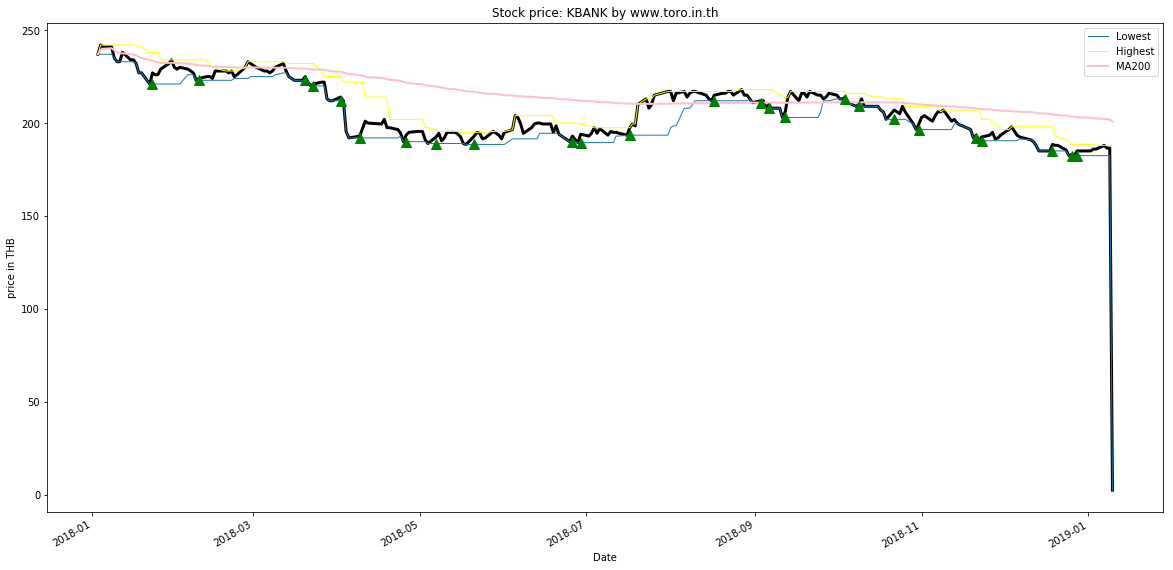

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
symbol = "kbank"
df = pd.read_csv("../data/"+symbol+".csv", index_col="Date", parse_dates=True)
df = df["2018":]
signals = pd.DataFrame(index=df.index)
window = 10

signals['signal'] = 0.0
signals['Close'] = df['Close']
signals['Lowest'] = df['Close'].rolling(window=window, min_periods=1, center=False).min()
signals['Highest'] = df['Close'].rolling(window=window, min_periods=1, center=False).max()
signals['MA200'] = df['Close'].rolling(window=200, min_periods=1, center=False).mean()

#Assign signal after short_window
signals['signal'][window:] = np.where(signals['Close'][window:] > signals['Lowest'][window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()

fig2 = plt.figure(figsize=(20, 10))
ax2 = fig2.add_subplot(111, ylabel="price in THB")
ax2.set_title("Stock price: "+symbol.upper()+" by www.toro.in.th")
df['Close'].plot(ax=ax2, color='black', lw=3.)
signals[['Lowest']].plot(ax=ax2, lw=1.)
signals[['Highest']].plot(ax=ax2, color='yellow', lw=1.)
signals[['MA200']].plot(ax=ax2, color='pink', lw=2)
ax2.plot(signals.loc[signals.positions==1.0].index,
            signals.Lowest[signals.positions==1.0],'^', markersize=10, color='g')
plt.show()

In [20]:
def check_buy(symbols):
    for symbol in symbols:
        symbol = symbol.lower()
        if symbol == "com7":
            continue
        df = pd.read_csv("../data/"+symbol+".csv", index_col="Date", parse_dates=True)
        df = df["2018":]
        signals = pd.DataFrame(index=df.index)
        window = 10

        signals['signal'] = 0.0
        signals['Close'] = df['Close']
        signals['Volume'] = df['Volume']
        signals['Lowest'] = df['Close'].rolling(window=window, min_periods=1, center=False).min()
        signals['Highest'] = df['Close'].rolling(window=window, min_periods=1, center=False).max()
        signals['MA200'] = df['Close'].rolling(window=200, min_periods=1, center=False).mean()

        #Assign signal after short_window
        signals['signal'][window:] = np.where(signals['Close'][window:] > signals['Lowest'][window:], 1.0, 0.0)
        signals['positions'] = signals['signal'].diff()
        if signals['positions'].tail(1).values == 1:
            if signals['Close'].tail(1).values * signals['Volume'].tail(1).values > 400000:
                print("Buy: "+symbol)

In [21]:
#symbol_file = open("../set100.txt","r")
symbol_file = open("../toro_trade_symbol.txt","r")
symbols = [x.strip('\n') for x in symbol_file.readlines()]

check_buy(symbols)

C:\Users\TOROCAPITAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Buy: apex
Buy: ingrs
